In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('shm_data\\tension.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,417017.0,476879.0,493486.0,431167.0,188138.0,27950.3,381723.0,546312.0,577482.0,488452.0,...,443348.0,491934.0,495627.0,417980.0,159484.0,56405.0,396093.0,548100.0,567573.0,463988.000000
1,414019.0,477523.0,493704.0,431222.0,188293.0,27793.4,381659.0,546247.0,577270.0,487986.0,...,443493.0,492009.0,495642.0,417975.0,159499.0,56368.9,396055.0,548106.0,567663.0,464173.000000
2,410925.0,478188.0,493929.0,431278.0,188454.0,27631.4,381592.0,546179.0,577051.0,487504.0,...,443643.0,492087.0,495657.0,417970.0,159516.0,56331.7,396016.0,548113.0,567757.0,464365.000000
3,407894.0,478839.0,494149.0,431334.0,188610.0,27472.8,381526.0,546113.0,576837.0,487033.0,...,443790.0,492163.0,495672.0,417965.0,159532.0,56295.2,395978.0,548119.0,567849.0,464552.000000
4,404847.0,479493.0,494371.0,431390.0,188768.0,27313.2,381460.0,546046.0,576622.0,486558.0,...,443937.0,492239.0,495687.0,417960.0,159548.0,56258.6,395939.0,548125.0,567941.0,464741.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,445149.0,490794.0,495010.0,428504.0,190001.0,22033.3,377081.0,550573.0,590010.0,499103.0,...,371315.0,450695.0,481250.0,414543.0,151422.0,65878.1,412298.0,615059.0,711784.0,26114.700000
3997,445562.0,490998.0,495033.0,428465.0,190028.0,21946.4,377013.0,550635.0,590194.0,499259.0,...,370258.0,450090.0,481039.0,414492.0,151302.0,66018.6,412539.0,616044.0,713901.0,19681.900000
3998,445980.0,491205.0,495056.0,428426.0,190056.0,21858.6,376944.0,550698.0,590379.0,499417.0,...,369189.0,449478.0,480825.0,414440.0,151181.0,66160.9,412783.0,617042.0,716044.0,13172.300000
3999,446400.0,491413.0,495079.0,428386.0,190084.0,21770.0,376874.0,550762.0,590567.0,499577.0,...,368112.0,448861.0,480610.0,414388.0,151060.0,66304.2,413028.0,618047.0,718203.0,6613.540000


In [16]:
x_train = list(df.values)
x_train.pop(0)
x_train = np.array(x_train)

mean = x_train.mean()
std = x_train.std()

x_train = (x_train - x_train.mean()) / x_train.std()
x_train.shape

(4000, 40)

In [17]:
y_train = np.array([i for i in range(40) for j in range(100)])
y_train.shape

(4000,)

In [18]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
'''
model = Sequential([
    Flatten(input_shape=(40,)),
    Dense(1000, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(40, activation='softmax'),
])
'''


model = Sequential([
    Flatten(input_shape=(40,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(40, activation='softmax'),
])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               5248      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 40)                5160      
Total params: 43,432
Trainable params: 43,432
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
x_train.shape, y_train.shape

((4000, 40), (4000,))

In [24]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
125/125 [==============================] - 0s 1ms/step - loss: 3.3472 - accuracy: 0.2345
Epoch 2/200
125/125 [==============================] - 0s 981us/step - loss: 1.4428 - accuracy: 0.7052
Epoch 3/200
125/125 [==============================] - 0s 998us/step - loss: 0.9651 - accuracy: 0.7871
Epoch 4/200
125/125 [==============================] - 0s 967us/step - 

125/125 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.9625
Epoch 148/200
125/125 [==============================] - 0s 885us/step - loss: 0.1348 - accuracy: 0.9618
Epoch 149/200
125/125 [==============================] - 0s 893us/step - loss: 0.1559 - accuracy: 0.9621
Epoch 150/200
125/125 [==============================] - 0s 948us/step - loss: 0.1287 - accuracy: 0.9681
Epoch 151/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9596
Epoch 152/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9655
Epoch 153/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.9638
Epoch 154/200
125/125 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9638
Epoch 155/200
125/125 [==============================] - 0s 893us/step - loss: 0.1453 - accuracy: 0.9652
Epoch 156/200
125/125 [==============================] - 0s 1ms/step - loss: 0.

In [15]:
weights = model.get_weights()
weights[-1]

array([ 0.04596815, -0.01605849, -0.07325634,  0.04263763, -0.03490384,
        0.0670274 ,  0.01049763, -0.07060746, -0.03475596, -0.01053843,
       -0.003431  , -0.02124359, -0.00598814, -0.01893825,  0.01424646,
        0.0158163 , -0.03578564, -0.03396157,  0.00257172, -0.03962605,
       -0.06798418,  0.0206489 , -0.02501201, -0.02504304,  0.00219047,
        0.0472233 , -0.0107379 , -0.03952321, -0.02522764, -0.03429427,
       -0.02368621, -0.03280333,  0.015093  , -0.01022642, -0.03034864,
        0.00805487, -0.05602621,  0.00033474,  0.01091663, -0.00534743],
      dtype=float32)

In [67]:
x_train = x_train * std + mean
x_train[0]

t = x_train[55].reshape(1,40)
p = np.squeeze(model.predict(t))
p, max(p)

(array([4.98058796e-07, 9.84260780e-08, 4.68303275e-04, 7.53687529e-11,
        1.51343746e-04, 2.88165415e-06, 2.65612066e-09, 2.91887729e-04,
        1.22040635e-08, 1.17327188e-04, 7.99492739e-08, 1.79719052e-07,
        3.22199303e-05, 4.07620576e-07, 1.16392034e-08, 1.34114013e-03,
        7.34623681e-11, 2.94459565e-03, 5.26126951e-06, 1.58524971e-09,
        1.54463081e-07, 3.86939064e-05, 1.57559530e-08, 3.38795104e-07,
        8.45463364e-06, 6.11548749e-05, 1.38035920e-11, 1.34410821e-02,
        6.49474387e-04, 1.17353860e-09, 2.65870570e-09, 6.85860925e-07,
        1.67198468e-05, 7.21710636e-10, 5.93506324e-04, 7.18510985e-01,
        8.59716351e-14, 1.76162839e-01, 8.51596147e-02, 9.71843786e-11],
       dtype=float32),
 0.718511)

In [25]:
for x in x_train:
    x = x.reshape(1, 40)
    predict = np.squeeze(model.predict(x)).tolist()
    #print(predict)
    print(predict.index(max(predict)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
15
15
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
35
35
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
35
35
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
15
15
15
15
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
15
15
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
3

In [435]:
weights = model.get_weights()

In [315]:
weights[0]

array([[-5.06150424e-01, -8.19709241e-01, -8.91907036e-01, ...,
        -5.44020057e-01, -8.58435869e-01, -6.04752481e-01],
       [ 4.90852684e-01,  7.61156917e-01,  3.73177320e-01, ...,
         3.82208228e-01,  5.13308227e-01, -4.60362643e-01],
       [-2.18311787e-01, -5.11898994e-01, -3.64617616e-01, ...,
         1.33637145e-01, -4.69649851e-01, -1.40106510e-02],
       ...,
       [-4.94192958e-01, -2.09253281e-01,  2.09127530e-01, ...,
        -1.16996825e-01,  5.60396584e-04,  2.37779766e-01],
       [ 1.22183330e-01, -1.29368948e-02,  2.22631782e-01, ...,
        -1.61796793e-01, -3.68597895e-01, -1.44472979e-02],
       [ 4.10489112e-01, -6.35927022e-02, -6.47539079e-01, ...,
         5.02836823e-01,  3.73652101e-01, -5.15326202e-01]], dtype=float32)

In [316]:
type(weights[5])

numpy.ndarray

In [317]:
weights[5]

array([ 1.5544654e-03, -2.3047460e-02, -6.1658854e-03,  2.9636375e-03,
       -1.9759042e-03,  2.6324369e-02, -1.5741646e-02, -2.5052044e-03,
       -1.9088240e-02,  5.5645881e-03, -3.0343877e-03, -7.0122853e-03,
       -1.9389736e-03,  6.7552144e-04,  4.0895613e-03,  8.5009327e-03,
       -2.6216340e-04, -1.4906344e-02,  1.7802424e-03, -1.6921982e-02,
       -9.0232631e-03,  4.8172907e-03,  3.8877632e-03, -4.8732371e-03,
        1.3309824e-03,  2.3604287e-02, -4.0324731e-04, -1.5408231e-02,
       -1.0451049e-02, -2.0896350e-03, -7.2429683e-03, -1.1486206e-02,
        4.8894137e-03,  2.5050984e-05, -7.5438390e-03,  7.2577992e-03,
        5.4374384e-04, -9.2878193e-03, -2.6320215e-02,  2.4235040e-02],
      dtype=float32)

In [369]:
weights[5]

array([ 3.8144947e-03, -1.0962537e-02, -3.6451686e-03, -2.2979118e-03,
        3.9705825e-03,  2.3631983e-02, -1.5103039e-03, -1.9925386e-02,
        3.7742986e-03,  6.9786882e-05, -4.5389691e-03, -1.1502039e-02,
       -1.0921568e-02, -8.5854428e-03, -2.2600454e-03, -4.4984734e-04,
       -1.7258301e-03, -2.0321561e-02, -1.2050318e-02,  9.3295617e-04,
        3.3889001e-03,  4.7199270e-03, -1.8043704e-02,  7.8601595e-03,
        3.1264019e-03,  3.0558586e-02, -1.5902048e-02, -1.8145422e-02,
        2.2260316e-03,  6.6820378e-03, -2.1714123e-02, -2.7123163e-03,
       -3.5069301e-03, -5.1013366e-03, -5.2793995e-03,  1.5865549e-02,
       -1.4177260e-02, -4.5525148e-03, -6.7373193e-03, -2.1559298e-02],
      dtype=float32)

In [377]:
weights[5]

array([-1.52467275e-02,  8.66981037e-03, -7.71559495e-03,  2.97720474e-03,
        6.22702576e-03,  1.79677103e-02, -3.02681327e-03, -1.36728277e-02,
        5.42106293e-03, -1.43407816e-02,  9.24920291e-03, -2.10309606e-02,
        4.98629222e-03, -9.13237338e-04,  4.88562090e-03,  1.05158640e-02,
       -1.81207545e-02, -6.55432604e-03, -1.96738373e-02,  5.31005935e-05,
       -9.27610509e-03,  1.00026112e-02, -9.88065358e-03, -8.21687840e-03,
       -2.91997660e-03,  2.00863797e-02, -1.41158113e-02, -3.87339480e-03,
       -1.93815287e-02, -1.38650881e-03, -1.26589974e-02,  1.24290891e-04,
       -9.91774723e-03,  1.34677766e-02, -1.52191725e-02,  1.62563380e-02,
       -1.32086389e-02, -6.52980478e-03,  7.48850172e-04, -7.55897537e-03],
      dtype=float32)

In [361]:
import matplotlib.pyplot as plt

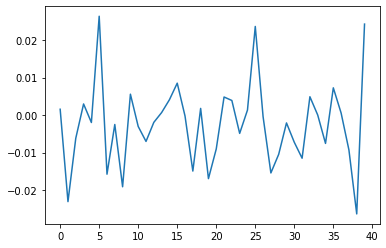

In [362]:
plt.plot(weights[5])

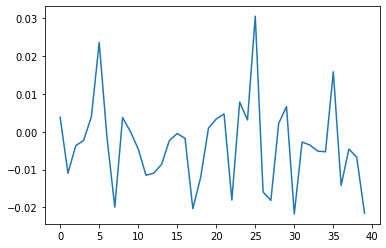

In [370]:
plt.plot(weights[5])

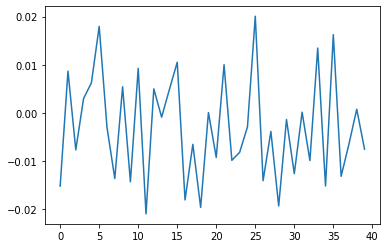

In [378]:
plt.plot(weights[5])

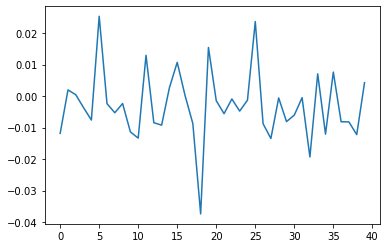

In [387]:
plt.plot(weights[5])

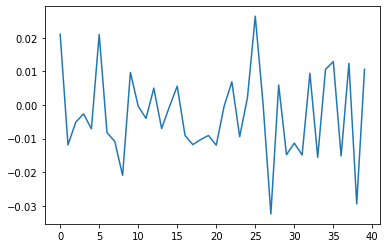

In [400]:
plt.plot(weights[5])

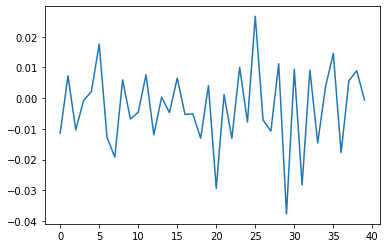

In [413]:
plt.plot(weights[5])

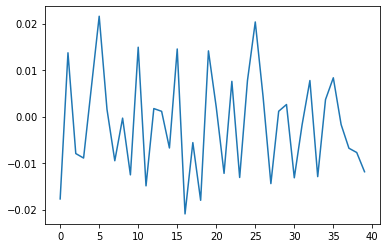

In [420]:
plt.plot(weights[5])

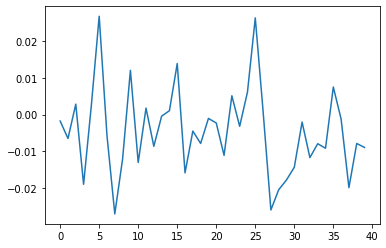

In [430]:
plt.plot(weights[5])

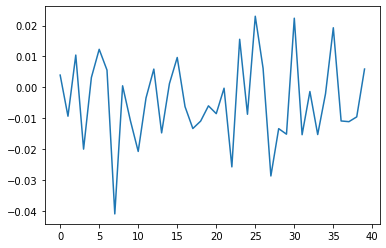

In [436]:
plt.plot(weights[5])

In [371]:
max(weights[5])

0.030558586

In [ ]:
weights = weights[5]

In [380]:
weights_list = list(weights[5])
weights_list.sort()
weights_list

[-0.02103096,
 -0.019673837,
 -0.019381529,
 -0.018120755,
 -0.0152467275,
 -0.015219172,
 -0.014340782,
 -0.014115811,
 -0.013672828,
 -0.013208639,
 -0.012658997,
 -0.009917747,
 -0.009880654,
 -0.009276105,
 -0.008216878,
 -0.007715595,
 -0.0075589754,
 -0.006554326,
 -0.006529805,
 -0.0038733948,
 -0.0030268133,
 -0.0029199766,
 -0.0013865088,
 -0.00091323734,
 5.3100594e-05,
 0.00012429089,
 0.0007488502,
 0.0029772047,
 0.004885621,
 0.004986292,
 0.005421063,
 0.0062270258,
 0.00866981,
 0.009249203,
 0.010002611,
 0.010515864,
 0.013467777,
 0.016256338,
 0.01796771,
 0.02008638]

In [381]:
w_list = list(weights[5])

for w in weights_list:
    print(w_list.index(w))

11
18
28
16
0
34
9
26
7
36
30
32
22
20
23
2
39
17
37
27
6
24
29
13
19
31
38
3
14
12
8
4
1
10
21
15
33
35
5
25


In [321]:
x_train.shape

(4000, 40)

In [354]:
x_test = x_train[2523]

In [355]:
x_test = x_test.reshape(1, 40)

In [356]:
y = model.predict(x_test)
print(y)

[[1.4079476e-04 2.9283026e-03 2.0049739e-04 1.6176101e-02 2.6366485e-03
  3.2049963e-01 2.7062697e-04 8.8842027e-03 3.5984849e-03 1.6022789e-04
  1.1704008e-04 8.5888661e-02 3.8138285e-05 8.0433106e-03 9.2185382e-03
  4.0933737e-03 3.5733411e-03 2.5095357e-04 2.7727411e-04 6.3591613e-03
  1.0417438e-03 4.0266678e-02 4.6481733e-04 2.5095385e-03 2.7573679e-02
  3.3218491e-01 4.9214496e-04 3.6390179e-03 4.1164416e-03 3.0303204e-03
  3.0277995e-02 1.9285397e-04 9.6822123e-04 1.8801482e-02 7.5173122e-04
  5.4540664e-02 7.2648737e-04 3.3827370e-04 9.7208342e-04 3.7555997e-03]]


In [357]:
max_y = max(y[0])
ys = list(y[0])
ys.index(max_y)

25